In [6]:
from prices_db import DB_PRICES_interact
import matplotlib.pyplot as plt
import seaborn
from ML import ridgeRegression

_db = DB_PRICES_interact()
prices1 = _db.getPricesFrom("BTC","2022-03-01")
prices2 = _db.getPricesFrom("ETH","2022-03-01")
dates = [price[0] for price in prices1]
btcPrices = [price[1] for price in prices1]
ethPrices = [price[1] for price in prices2]

Text(0.5, 1.0, 'Piecewise examples')

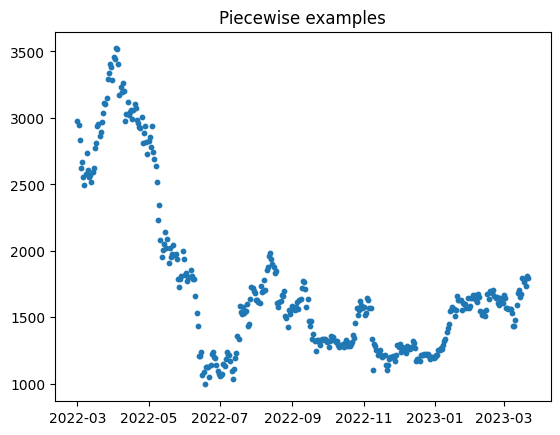

In [7]:
fig, ax = plt.subplots(1, 1)
ax.scatter(dates,ethPrices,s=10)
ax.set_title("Piecewise examples")

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np
dates = np.array([x for x in range(0,len(ethPrices))])
dates = np.reshape(dates,(-1,1))
ethPrices = np.array(ethPrices)
X_train, X_test, y_train, y_test = train_test_split(dates[:, :1], ethPrices)


In [51]:
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
model = PiecewiseRegressor(verbose=True,
                           binner=DecisionTreeRegressor(min_samples_leaf=150),
                           estimator=LinearRegression(),
                           )
model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


PiecewiseRegressor(binner=DecisionTreeRegressor(min_samples_leaf=150),
                   estimator=LinearRegression(), verbose=True)

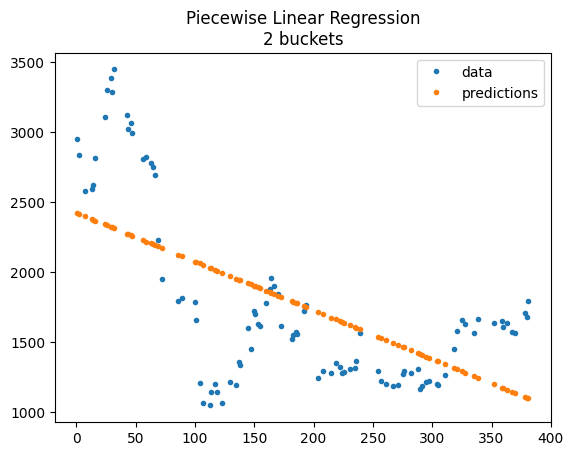

In [52]:
# pred = 
# pred[:5]

fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n2 buckets")
ax.legend()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


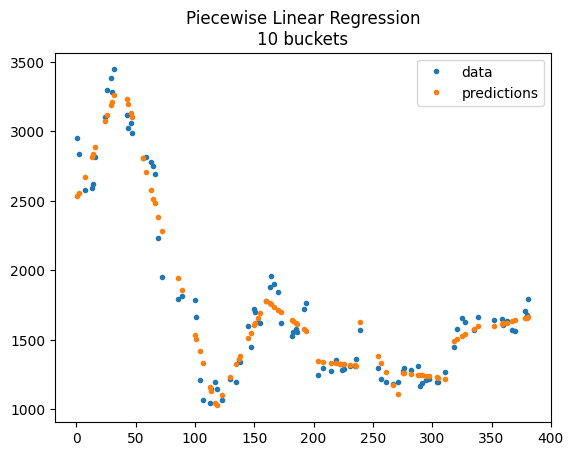

In [48]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.dummy import DummyRegressor
buckets = 10
model = PiecewiseRegressor(verbose=True,
                           binner=KBinsDiscretizer(n_bins=buckets),
                           estimator=LinearRegression()
                           )
model.fit(X_train, y_train)
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title(f"Piecewise Linear Regression\n{buckets} buckets")
ax.legend()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


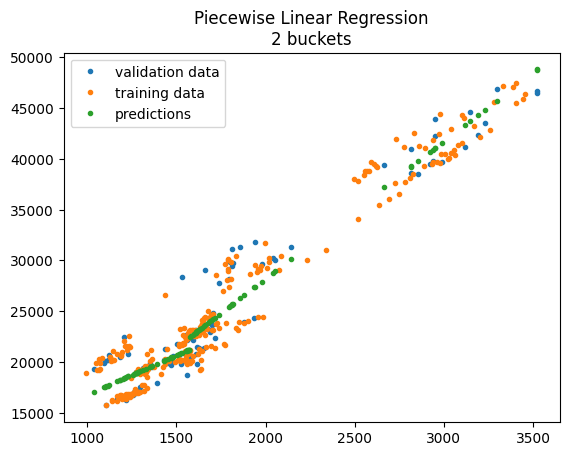

In [58]:
# tenter une regression par morceau sur f(eth) = btc
btcPrices = np.array(btcPrices)
X_train, X_test, y_train, y_test = train_test_split(ethPrices,btcPrices)

buckets = 2
model = PiecewiseRegressor(verbose=True,
                           binner=KBinsDiscretizer(n_bins=buckets),
                           estimator=LinearRegression()
                           )
X_train = np.reshape(X_train,(-1,1))
X_test = np.reshape(X_test,(-1,1))
model.fit(X_train, y_train)

fig, ax = plt.subplots(1, 1)
ax.plot(X_test, y_test, ".", label='validation data')
ax.plot(X_train, y_train, ".", label='training data')
ax.plot(X_test, model.predict(X_test), ".", label="predictions")
ax.set_title(f"Piecewise Linear Regression\n{buckets} buckets")
ax.legend()

r2 score test vs pred for y axis :  0.9584213005698956


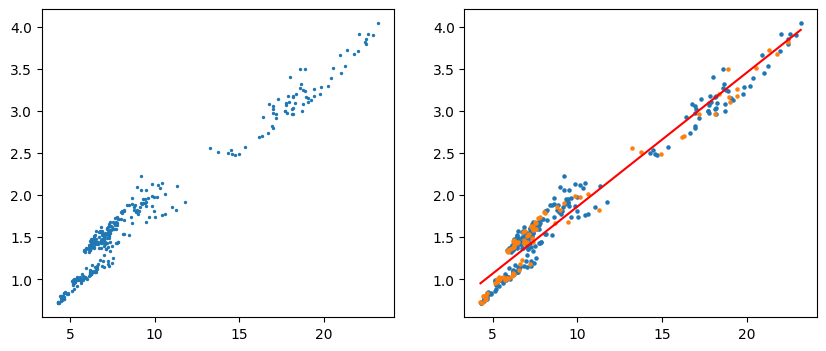

In [ ]:
prices1 = _db.getPricesFrom("DOT","2022-03-01")
prices2 = _db.getPricesFrom("XTZ","2022-03-01")
x_axis1 = [price[0] for price in prices1]
y_axis1 = [price[1] for price in prices1]
x_axis2 = [price[0] for price in prices2]
y_axis2 = [price[1] for price in prices2]

# plt.plot(x_axis1,y_axis1,x_axis2,y_axis2)
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].scatter(y_axis1,y_axis2,s=2)
ypred = ridgeRegression(y_axis1,y_axis2)

(array([ 86., 149.,  41.,  14.,   1.,   7.,  13.,  29.,   9.,  10.]),
 array([ 4.284 ,  6.1756,  8.0672,  9.9588, 11.8504, 13.742 , 15.6336,
        17.5252, 19.4168, 21.3084, 23.2   ]),
 <BarContainer object of 10 artists>)

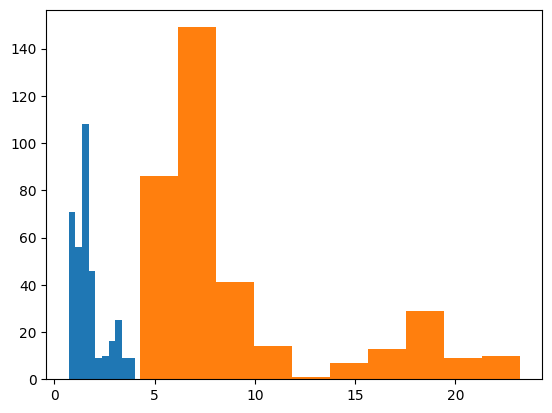

In [ ]:
plt.hist(y_axis2)
plt.hist(y_axis1)